In [2]:
import os

os.chdir('C:/Users/EunJin/Desktop/dacon/뱅크샐러드/train')
os.getcwd()

'C:\\Users\\EunJin\\Desktop\\dacon\\뱅크샐러드\\train'

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)

train = pd.read_csv('train.csv')
train.head(10)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
5,0,2016-12-19,13:36:39,30b1422f77,44,NaN,0,0
6,0,2016-12-19,14:00:23,6dd8dad5ab,146,NaN,0,0
7,0,2016-12-19,14:01:36,a4a425c5d2,6,NaN,0,0
8,0,2016-12-19,14:09:46,f213c011fe,306,NaN,0,0
9,0,2016-12-19,14:13:02,a185b7b11f,51,NaN,0,0


In [5]:
train.shape

(3362796, 8)

## 전처리 해야할 것
- 결측치 0으로 대체
- date + time 변수 -> timestamp 변수로 대체
- date -> year/month/day 변수 만들기
- time -> hour/min/sec 변수 만들기
- 계절(봄,여름,가을,겨울) 변수 만들기
- 시간대(새벽,오전,오후,저녁,밤) 변수 만들기

In [6]:
# 결측치 대체
train = train.fillna(0)
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [7]:
# timestamp 변수 만들기

train['timestamp'] = train.date+' '+train.time

In [8]:
#import datetime

train['timestamp'] = pd.to_datetime(train['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [9]:
# year/month/day 변수 만들기

train['year'] = train['date'].apply(lambda x: int(x[:4]))
train['month'] = train['date'].apply(lambda x: int(x[5:7]))
train['day'] = train['date'].apply(lambda x: int(x[8:10]))

# hour/min/sec 변수 만들기

train['hour'] = train['time'].apply(lambda x: int(x[:2]))
train['min'] = train['time'].apply(lambda x: int(x[3:5]))
train['sec'] = train['time'].apply(lambda x: int(x[6:8]))

train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,timestamp,year,month,day,hour,min,sec
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,2016-12-14 18:05:31,2016,12,14,18,5,31
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,2016-12-14 18:05:54,2016,12,14,18,5,54
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,2016-12-19 12:42:31,2016,12,19,12,42,31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,2016-12-19 12:48:08,2016,12,19,12,48,8
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,2016-12-19 13:31:08,2016,12,19,13,31,8


- 계절 : 봄(3,4,5) / 여름(6,7,8) / 가을(9,10,11) / 겨울(12,1,2)
- 시간대 : 새벽(1,2,3,4,5) / 아침(6,7,8,9,10) / 점심(11,12,13,14) / 오후(15,16,17) / 저녁(18,19,20) / 밤(21,22,23,24)

In [10]:
def seasonal(month) :
    if (month <= 5) & (month >= 3):
        return 0
    elif (month >= 6) & (month <= 8):
        return 1
    elif (month >= 9) & (month <= 11):
        return 2
    else :
        return 3
train['season'] = train['month'].apply(lambda x : seasonal(x))

In [11]:
def timezone(month) :
    if (month <= 5) & (month >= 1):
        return 0
    elif (month >= 6) & (month <= 10):
        return 1
    elif (month >= 11) & (month <= 14):
        return 2
    elif (month >= 15) & (month <= 17):
        return 3
    elif (month >= 18) & (month <= 20):
        return 4
    else :
        return 5
train['timezone'] = train['hour'].apply(lambda x : timezone(x))

In [12]:
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train.describe()

,store_id,amount,installments,days_of_week,holyday,year,month,day,hour,min,sec,season,timezone
count,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00,3362796.00
mean,832.38,145.96,0.02,3.07,0.04,2017.25,6.33,15.83,15.35,29.51,29.50,1.39,3.07
std,546.85,601.73,0.30,1.98,0.21,0.68,3.33,8.79,5.19,17.32,17.32,1.13,1.35
min,0.00,-250000.00,0.00,0.00,0.00,2016.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,335.00,32.00,0.00,1.00,0.00,2017.00,4.00,8.00,12.00,15.00,14.00,0.00,2.00
50%,822.00,75.00,0.00,3.00,0.00,2017.00,6.00,16.00,16.00,30.00,29.00,1.00,3.00
75%,1342.00,150.00,0.00,5.00,0.00,2018.00,9.00,23.00,19.00,45.00,45.00,2.00,4.00
max,1799.00,250000.00,36.00,6.00,1.00,2018.00,12.00,31.00,23.00,59.00,59.00,3.00,5.00


# store_id별로 데이터를 구축하자

In [13]:
result = train.groupby(by='store_id', as_index=False).agg({'card_id': pd.Series.nunique})
result.head()

,store_id,card_id
0,0,12727
1,1,8
2,2,9053
3,3,231
4,4,1176


In [14]:
result['count'] = train.groupby('store_id')['timestamp'].count()
result.head()

,store_id,card_id,count
0,0,12727,68773.00
1,1,8,40.00
2,2,9053,16829.00
3,3,231,383.00
4,4,1176,2082.00


In [15]:
result = result.rename(columns={'store_id': 'store_id', 'card_id': 'n_card', 'count': 'count'})

In [16]:
# amount의 range를 넣고 싶었음
result['amount_q25'] = train.groupby('store_id')['amount'].quantile(0.25)
result['amount_q50'] = train.groupby('store_id')['amount'].quantile(0.50)
result['amount_q75'] = train.groupby('store_id')['amount'].quantile(0.75)

In [17]:
result['total_amount'] = train.groupby('store_id')['amount'].sum()

In [18]:
result['count/n_card'] = result['count']/result['n_card']
result['total_amount/n_card'] = result['total_amount']/result['n_card']

In [19]:
result['weekdays_count'] = train[train['days_of_week']<=4].groupby('store_id')['timestamp'].count()
result['weekend_count'] = train[train['days_of_week']>=5].groupby('store_id')['timestamp'].count()

In [20]:
result['weekdays_avg'] = result['weekdays_count']/5
result['weekend_avg'] = result['weekend_count']/2

In [21]:
result['weekdays_sum'] = train[train['days_of_week']<=4].groupby('store_id')['amount'].sum()
result['weekend_sum'] = train[train['days_of_week']>=5].groupby('store_id')['amount'].sum()

result['weekdays_amount_avg'] = result['weekdays_sum']/5
result['weekend_amount_avg'] = result['weekend_sum']/2

In [23]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns    
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

# Visualization

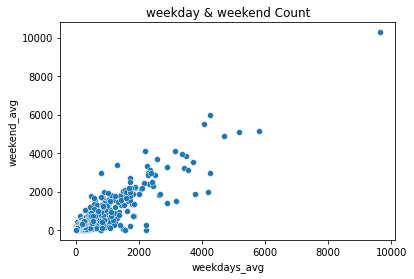

In [30]:
#주중과 주말 이용빈도
sns.scatterplot(x='weekdays_avg', y='weekend_avg', data=result)
plt.title('weekday & weekend Count')
plt.show()

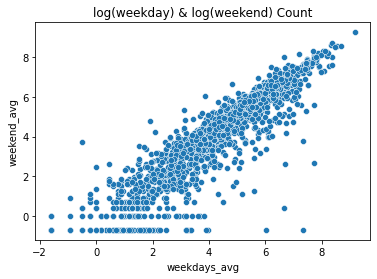

In [29]:
sns.scatterplot(x=np.log(result['weekdays_avg']), y=np.log(result['weekend_avg']), data=result)
plt.title('log(weekday) & log(weekend) Count')
plt.show()

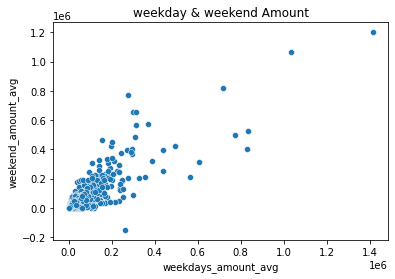

In [31]:
#주중과 주말 이용금액
sns.scatterplot(x='weekdays_amount_avg', y='weekend_amount_avg', data=result)
plt.title('weekday & weekend Amount')
plt.show()

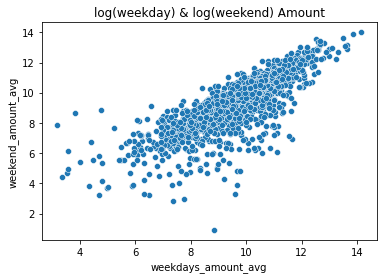

In [32]:
sns.scatterplot(x=np.log(result['weekdays_amount_avg']), y=np.log(result['weekend_amount_avg']), data=result)
plt.title('log(weekday) & log(weekend) Amount')
plt.show()

In [33]:
train['installments_yes'] = 0
train['installments_yes'][train['installments']>=1] = 1
train['installments_yes'].describe()

count   3362796.00
mean          0.01
std           0.07
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: installments_yes, dtype: float64

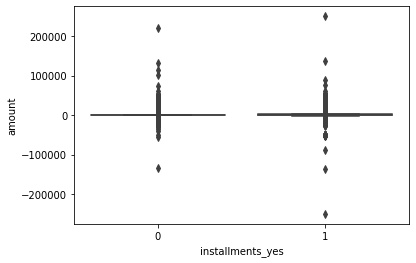

In [34]:
sns.boxplot(x="installments_yes", y="amount", data=train)
plt.show()

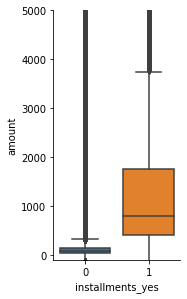

In [39]:
# 할부 여부에 따른 amount box plot -> 할부한 경우 amount 범위가 더 크고 넓었다.
# y범위(-100,5000)

sns.factorplot(x="installments_yes", y="amount",  data=train, kind="box", size=4, aspect=0.7)
plt.ylim(-100, 5000)
plt.show()

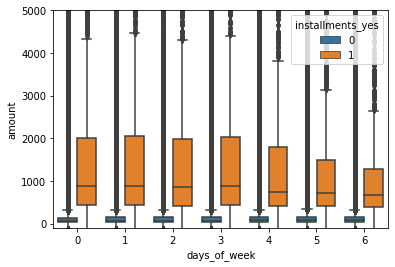

In [40]:
# y범위(-100,5000)

sns.boxplot(x="days_of_week", y="amount", hue="installments_yes", data=train)
plt.ylim(-100, 5000)
plt.show()

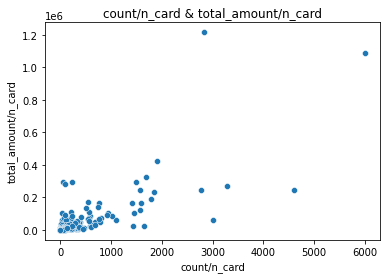

In [41]:
#고객 평균 이용 횟수와 평균 사용 금액
sns.scatterplot(x='count/n_card', y='total_amount/n_card', data=result)
plt.title('count/n_card & total_amount/n_card')
plt.show()

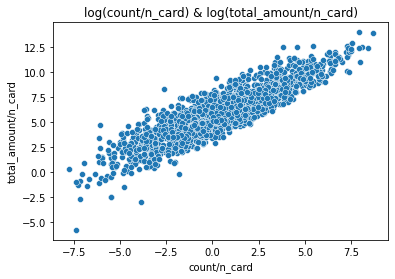

In [42]:
sns.scatterplot(x=np.log(result['count/n_card']), y=np.log(result['total_amount/n_card']), data=result)
plt.title('log(count/n_card) & log(total_amount/n_card)')
plt.show()

In [44]:
result.head()

,store_id,n_card,count,amount_q25,amount_q50,amount_q75,total_amount,count/n_card,total_amount/n_card,weekdays_count,weekend_count,weekdays_avg,weekend_avg,weekdays_sum,weekend_sum,weekdays_amount_avg,weekend_amount_avg
0,0,12727,68773.00,26.00,51.00,96.00,5234611.00,5.40,411.30,48232.00,20541.00,9646.40,10270.50,3595164.00,1639447.00,719032.80,819723.50
1,1,8,40.00,1550.00,2200.00,4125.00,147950.00,5.00,18493.75,39.00,1.00,7.80,0.50,135950.00,12000.00,27190.00,6000.00
2,2,9053,16829.00,40.00,80.00,120.00,1615060.00,1.86,178.40,13238.00,3591.00,2647.60,1795.50,1247258.00,367802.00,249451.60,183901.00
3,3,231,383.00,60.00,110.00,160.00,62781.00,1.66,271.78,377.00,6.00,75.40,3.00,61296.00,1485.00,12259.20,742.50
4,4,1176,2082.00,70.00,100.00,135.00,270312.00,1.77,229.86,1336.00,746.00,267.20,373.00,173262.00,97050.00,34652.40,48525.00


# 단골 손님 찾기
- 일주일에 2번 이상 방문한 고객 -> 단골

In [45]:
#일주일 기준
train['week_number'] = train['timestamp'].dt.isocalendar().week

In [46]:
df_week = train.groupby(by=['store_id','year','week_number', 'card_id'], as_index=False).agg({'timestamp': pd.Series.count})
df_week.head()

,store_id,year,week_number,card_id,timestamp
0,0,2016,50,d297bba73f,2
1,0,2016,51,007b34fb85,1
2,0,2016,51,0104ea7256,2
3,0,2016,51,0130c98e0d,3
4,0,2016,51,01a9950cd0,1


In [47]:
df_week[df_week['timestamp']>50]

,store_id,year,week_number,card_id,timestamp
2567082,1551,2018,10,53817035d4,53


In [48]:
df_week2 = df_week[df_week['timestamp']>=2].reset_index(drop=True)
df_week2.head()

,store_id,year,week_number,card_id,timestamp
0,0,2016,50,d297bba73f,2
1,0,2016,51,0104ea7256,2
2,0,2016,51,0130c98e0d,3
3,0,2016,51,03aa3afe7a,2
4,0,2016,51,047823e75e,2


In [80]:
df_week2_gb = df_week2.groupby(by=['store_id','year','week_number'], as_index=False).agg({'card_id': pd.Series.nunique})
df_week2_gb = df_week2_gb.rename(columns={'card_id': 'n_card_week2'})

In [81]:
temp = train.groupby(by=['store_id','year','week_number'], as_index=False).agg({'card_id': pd.Series.nunique})
temp = temp.rename(columns={'card_id': 'n_card_total'})
temp[temp['store_id']==2]

,store_id,year,week_number,n_card_total
121,2,2016,31,127
122,2,2016,32,135
123,2,2016,33,125
124,2,2016,34,136
125,2,2016,35,190
...,...,...,...,...
221,2,2018,27,146
222,2,2018,28,140
223,2,2018,29,130
224,2,2018,30,128


In [82]:
df_week2_gb = pd.merge(df_week2_gb, temp, how='right')
df_week2_gb['regular_percent'] = 100*df_week2_gb['n_card_week2']/df_week2_gb['n_card_total']
df_week2_gb.fillna(0, inplace=True)
df_week2_gb.head()

,store_id,year,week_number,n_card_week2,n_card_total,regular_percent
0,0,2016,50,1.00,1,100.00
1,0,2016,51,175.00,657,26.64
2,0,2016,52,119.00,486,24.49
3,0,2017,1,146.00,561,26.02
4,0,2017,2,150.00,607,24.71


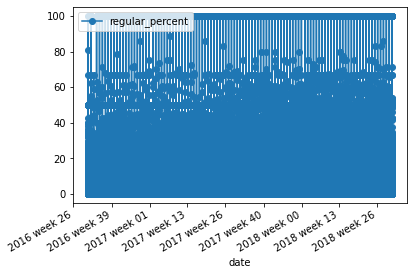

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Determine the date
df_week2_gb['date'] = pd.to_datetime(df_week2_gb.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df_week2_gb.week_number*7, unit='days')

# Plot
fig, ax = plt.subplots()
df_week2_gb.plot(x='date', y='regular_percent', marker='o', ax=ax)

# Format the x-ticks
myFmt = mdates.DateFormatter('%Y week %U')
ax.xaxis.set_major_formatter(myFmt)

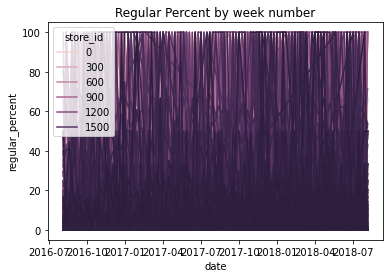

In [85]:
#plt.figure(figsize=(20,20))

sns.lineplot(x='date', y='regular_percent', hue='store_id',data=df_week2_gb)
plt.title('Regular Percent by week number')
plt.show()

In [83]:
'''import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
import plotly.express as px


fig = px.line(df_week2_gb, x="date", y="regular_percent",
              hover_data={"date": "|%B %d, %Y"},
              title='주별 단골고객', color="store_id")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()
'''

'import plotly.express as px\nimport plotly.graph_objects as go\nfrom plotly.subplots import make_subplots\n\n# for offline ploting\nfrom plotly.offline import plot, iplot, init_notebook_mode\ninit_notebook_mode(connected=True)\nimport plotly.io as pio\nimport plotly.express as px\n\n\nfig = px.line(df_week2_gb, x="date", y="regular_percent",\n              hover_data={"date": "|%B %d, %Y"},\n              title=\'주별 단골고객\', color="store_id")\nfig.update_xaxes(\n    dtick="M1",\n    tickformat="%b\n%Y")\nfig.show()\n'

In [86]:
df_week2_gb[df_week2_gb['store_id']==2]

,store_id,year,week_number,n_card_week2,n_card_total,regular_percent,date
121,2,2016,31,6.00,127,4.72,2016-08-05
122,2,2016,32,8.00,135,5.93,2016-08-12
123,2,2016,33,6.00,125,4.80,2016-08-19
124,2,2016,34,5.00,136,3.68,2016-08-26
125,2,2016,35,5.00,190,2.63,2016-09-02
...,...,...,...,...,...,...,...
221,2,2018,27,7.00,146,4.79,2018-07-09
222,2,2018,28,5.00,140,3.57,2018-07-16
223,2,2018,29,5.00,130,3.85,2018-07-23
224,2,2018,30,3.00,128,2.34,2018-07-30


In [87]:
df_week2_gb[df_week2_gb['store_id']==0]

,store_id,year,week_number,n_card_week2,n_card_total,regular_percent,date
0,0,2016,50,1.00,1,100.00,2016-12-16
1,0,2016,51,175.00,657,26.64,2016-12-23
2,0,2016,52,119.00,486,24.49,2016-12-30
3,0,2017,1,146.00,561,26.02,2017-01-08
4,0,2017,2,150.00,607,24.71,2017-01-15
...,...,...,...,...,...,...,...
81,0,2018,27,154.00,606,25.41,2018-07-09
82,0,2018,28,145.00,615,23.58,2018-07-16
83,0,2018,29,171.00,618,27.67,2018-07-23
84,0,2018,30,162.00,595,27.23,2018-07-30


In [91]:
# 단골손님 퍼센트(일주일 단위) -> 평균
df_regular = df_week2_gb.groupby(by=['store_id'], as_index=False).agg({'regular_percent': pd.Series.mean})
df_regular.head()

,store_id,regular_percent
0,0,26.89
1,1,4.29
2,2,3.81
3,3,5.34
4,4,7.92


In [95]:
df_regular[df_regular['regular_percent']>100]

,store_id,regular_percent


In [96]:
result = pd.merge(result, df_regular, how='left', on=['store_id'])
result.head()

,store_id,n_card,count,amount_q25,amount_q50,amount_q75,total_amount,count/n_card,total_amount/n_card,weekdays_count,weekend_count,weekdays_avg,weekend_avg,weekdays_sum,weekend_sum,weekdays_amount_avg,weekend_amount_avg,regular_percent
0,0,12727,68773.00,26.00,51.00,96.00,5234611.00,5.40,411.30,48232.00,20541.00,9646.40,10270.50,3595164.00,1639447.00,719032.80,819723.50,26.89
1,1,8,40.00,1550.00,2200.00,4125.00,147950.00,5.00,18493.75,39.00,1.00,7.80,0.50,135950.00,12000.00,27190.00,6000.00,4.29
2,2,9053,16829.00,40.00,80.00,120.00,1615060.00,1.86,178.40,13238.00,3591.00,2647.60,1795.50,1247258.00,367802.00,249451.60,183901.00,3.81
3,3,231,383.00,60.00,110.00,160.00,62781.00,1.66,271.78,377.00,6.00,75.40,3.00,61296.00,1485.00,12259.20,742.50,5.34
4,4,1176,2082.00,70.00,100.00,135.00,270312.00,1.77,229.86,1336.00,746.00,267.20,373.00,173262.00,97050.00,34652.40,48525.00,7.92


# 시간대 비중

In [98]:
train.head(1)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,timestamp,year,month,day,hour,min,sec,season,timezone,installments_yes,week_number
0,0,2016-12-14,18:05:31,d297bba73f,5,0.00,2,0,2016-12-14 18:05:31,2016,12,14,18,5,31,3,4,0,50


In [107]:
df_time = pd.pivot_table(train, index = ['store_id'], values = ['timestamp'], columns = 'timezone', aggfunc = 'count',fill_value=0)
df_time = pd.DataFrame(df_time.to_records())
df_time = df_time.rename(columns=lambda x: x.replace("(","").replace(",","").replace(")","").replace("'","").replace(" ","").replace("timestamp","timezone")) 

df_time.head()

,store_id,timezone0,timezone1,timezone2,timezone3,timezone4,timezone5
0,0,5989,7583,9400,11697,17568,16536
1,1,0,0,3,26,10,1
2,2,944,1779,8887,1240,2379,1600
3,3,0,2,180,170,31,0
4,4,0,19,1332,250,481,0


- 시간대 : 새벽(1,2,3,4,5) / 아침(6,7,8,9,10) / 점심(11,12,13,14) / 오후(15,16,17) / 저녁(18,19,20) / 밤(21,22,23,24)

In [108]:
df_time.columns = ['store_id','t01_05','t06_10','t11_14','t15_17','t18_20','t21_24']

In [109]:
df_time.head(1)

,store_id,t01_05,t06_10,t11_14,t15_17,t18_20,t21_24
0,0,5989,7583,9400,11697,17568,16536


In [110]:
df_time['p01_05'] = 100*df_time['t01_05']/(df_time['t01_05']+df_time['t06_10']+df_time['t11_14']+df_time['t15_17']+df_time['t18_20']+df_time['t21_24'])
df_time['p06_10'] = 100*df_time['t06_10']/(df_time['t01_05']+df_time['t06_10']+df_time['t11_14']+df_time['t15_17']+df_time['t18_20']+df_time['t21_24'])
df_time['p11_14'] = 100*df_time['t11_14']/(df_time['t01_05']+df_time['t06_10']+df_time['t11_14']+df_time['t15_17']+df_time['t18_20']+df_time['t21_24'])
df_time['p15_17'] = 100*df_time['t15_17']/(df_time['t01_05']+df_time['t06_10']+df_time['t11_14']+df_time['t15_17']+df_time['t18_20']+df_time['t21_24'])
df_time['p18_20'] = 100*df_time['t18_20']/(df_time['t01_05']+df_time['t06_10']+df_time['t11_14']+df_time['t15_17']+df_time['t18_20']+df_time['t21_24'])
df_time['p21_24'] = 100*df_time['t21_24']/(df_time['t01_05']+df_time['t06_10']+df_time['t11_14']+df_time['t15_17']+df_time['t18_20']+df_time['t21_24'])


df_time.head()

,store_id,t01_05,t06_10,t11_14,t15_17,t18_20,t21_24,p01_05,p06_10,p11_14,p15_17,p18_20,p21_24
0,0,5989,7583,9400,11697,17568,16536,8.71,11.03,13.67,17.01,25.54,24.04
1,1,0,0,3,26,10,1,0.00,0.00,7.50,65.00,25.00,2.50
2,2,944,1779,8887,1240,2379,1600,5.61,10.57,52.81,7.37,14.14,9.51
3,3,0,2,180,170,31,0,0.00,0.52,47.00,44.39,8.09,0.00
4,4,0,19,1332,250,481,0,0.00,0.91,63.98,12.01,23.10,0.00


In [111]:
result = pd.merge(result, df_time, how='left', on='store_id')
result.head(1)

,store_id,n_card,count,amount_q25,amount_q50,amount_q75,total_amount,count/n_card,total_amount/n_card,weekdays_count,weekend_count,weekdays_avg,weekend_avg,weekdays_sum,weekend_sum,weekdays_amount_avg,weekend_amount_avg,regular_percent,t01_05,t06_10,t11_14,t15_17,t18_20,t21_24,p01_05,p06_10,p11_14,p15_17,p18_20,p21_24
0,0,12727,68773.00,26.00,51.00,96.00,5234611.00,5.40,411.30,48232.00,20541.00,9646.40,10270.50,3595164.00,1639447.00,719032.80,819723.50,26.89,5989,7583,9400,11697,17568,16536,8.71,11.03,13.67,17.01,25.54,24.04


In [112]:
result.head()

,store_id,n_card,count,amount_q25,amount_q50,amount_q75,total_amount,count/n_card,total_amount/n_card,weekdays_count,weekend_count,weekdays_avg,weekend_avg,weekdays_sum,weekend_sum,weekdays_amount_avg,weekend_amount_avg,regular_percent,t01_05,t06_10,t11_14,t15_17,t18_20,t21_24,p01_05,p06_10,p11_14,p15_17,p18_20,p21_24
0,0,12727,68773.00,26.00,51.00,96.00,5234611.00,5.40,411.30,48232.00,20541.00,9646.40,10270.50,3595164.00,1639447.00,719032.80,819723.50,26.89,5989,7583,9400,11697,17568,16536,8.71,11.03,13.67,17.01,25.54,24.04
1,1,8,40.00,1550.00,2200.00,4125.00,147950.00,5.00,18493.75,39.00,1.00,7.80,0.50,135950.00,12000.00,27190.00,6000.00,4.29,0,0,3,26,10,1,0.00,0.00,7.50,65.00,25.00,2.50
2,2,9053,16829.00,40.00,80.00,120.00,1615060.00,1.86,178.40,13238.00,3591.00,2647.60,1795.50,1247258.00,367802.00,249451.60,183901.00,3.81,944,1779,8887,1240,2379,1600,5.61,10.57,52.81,7.37,14.14,9.51
3,3,231,383.00,60.00,110.00,160.00,62781.00,1.66,271.78,377.00,6.00,75.40,3.00,61296.00,1485.00,12259.20,742.50,5.34,0,2,180,170,31,0,0.00,0.52,47.00,44.39,8.09,0.00
4,4,1176,2082.00,70.00,100.00,135.00,270312.00,1.77,229.86,1336.00,746.00,267.20,373.00,173262.00,97050.00,34652.40,48525.00,7.92,0,19,1332,250,481,0,0.00,0.91,63.98,12.01,23.10,0.00


# 공휴일 amount관련도 넣어보자
- 예를 들어, 병원같은 경우 공휴일에 영업을 거의 하지 않을 것
- 공휴일이랑 주말이랑도 비교해보자

In [113]:
train.head(1)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,timestamp,year,month,day,hour,min,sec,season,timezone,installments_yes,week_number
0,0,2016-12-14,18:05:31,d297bba73f,5,0.00,2,0,2016-12-14 18:05:31,2016,12,14,18,5,31,3,4,0,50


In [114]:
train[train['holyday']==1].groupby(['store_id'])['amount'].sum()

store_id
0       308833
2        42772
3          455
4         7085
5        14034
         ...  
1795     38423
1796       274
1797      2000
1798      5755
1799      6900
Name: amount, Length: 1484, dtype: int64

In [122]:
# 공휴일 하루 평균 매출액
df_holiday = train[train['holyday']==1].groupby(by=['store_id'], as_index=False).agg({'amount': pd.Series.sum})
df_holiday = df_holiday.rename(columns={'amount': 'holiday_total_amount'})
df_holiday.head()

,store_id,holiday_total_amount
0,0,308833
1,2,42772
2,3,455
3,4,7085
4,5,14034


In [128]:
df_holiday['n_holiday'] = train[train['holyday']==1].groupby(by=['store_id'], as_index=False).agg({'date': pd.Series.nunique})['date']
df_holiday.head()

,store_id,holiday_total_amount,n_holiday
0,0,308833,31
1,2,42772,30
2,3,455,3
3,4,7085,12
4,5,14034,3


In [129]:
# 하루(전체 기간, 공휴일 포함) 수
df_date = train.groupby(by=['store_id'], as_index=False).agg({'date': pd.Series.nunique})
df_date.columns = ['store_id','n_days']
df_date.head()

,store_id,n_days
0,0,591
1,1,36
2,2,722
3,3,251
4,4,367


In [130]:
result = pd.merge(result, df_holiday, how='left')
result = pd.merge(result, df_date, how='left')

In [132]:
result.fillna(0, inplace=True)
result.head()

,store_id,n_card,count,amount_q25,amount_q50,amount_q75,total_amount,count/n_card,total_amount/n_card,weekdays_count,weekend_count,weekdays_avg,weekend_avg,weekdays_sum,weekend_sum,weekdays_amount_avg,weekend_amount_avg,regular_percent,t01_05,t06_10,t11_14,t15_17,t18_20,t21_24,p01_05,p06_10,p11_14,p15_17,p18_20,p21_24,holiday_total_amount,n_holiday,n_days
0,0,12727,68773.00,26.00,51.00,96.00,5234611.00,5.40,411.30,48232.00,20541.00,9646.40,10270.50,3595164.00,1639447.00,719032.80,819723.50,26.89,5989,7583,9400,11697,17568,16536,8.71,11.03,13.67,17.01,25.54,24.04,308833.00,31.00,591
1,1,8,40.00,1550.00,2200.00,4125.00,147950.00,5.00,18493.75,39.00,1.00,7.80,0.50,135950.00,12000.00,27190.00,6000.00,4.29,0,0,3,26,10,1,0.00,0.00,7.50,65.00,25.00,2.50,0.00,0.00,36
2,2,9053,16829.00,40.00,80.00,120.00,1615060.00,1.86,178.40,13238.00,3591.00,2647.60,1795.50,1247258.00,367802.00,249451.60,183901.00,3.81,944,1779,8887,1240,2379,1600,5.61,10.57,52.81,7.37,14.14,9.51,42772.00,30.00,722
3,3,231,383.00,60.00,110.00,160.00,62781.00,1.66,271.78,377.00,6.00,75.40,3.00,61296.00,1485.00,12259.20,742.50,5.34,0,2,180,170,31,0,0.00,0.52,47.00,44.39,8.09,0.00,455.00,3.00,251
4,4,1176,2082.00,70.00,100.00,135.00,270312.00,1.77,229.86,1336.00,746.00,267.20,373.00,173262.00,97050.00,34652.40,48525.00,7.92,0,19,1332,250,481,0,0.00,0.91,63.98,12.01,23.10,0.00,7085.00,12.00,367


In [133]:
result[result['n_days']==0]

,store_id,n_card,count,amount_q25,amount_q50,amount_q75,total_amount,count/n_card,total_amount/n_card,weekdays_count,weekend_count,weekdays_avg,weekend_avg,weekdays_sum,weekend_sum,weekdays_amount_avg,weekend_amount_avg,regular_percent,t01_05,t06_10,t11_14,t15_17,t18_20,t21_24,p01_05,p06_10,p11_14,p15_17,p18_20,p21_24,holiday_total_amount,n_holiday,n_days


* DAU(Daily Active User) - 일간 유니크 접속 유저

* MAU(Monthly Active User) - 월간 유니크 접속 유저

* ARPDAU(Average Revenue Per DAU) - 유니크 일간 접속 유저 당 결제액

* ARPPU(Average Revenue Per Paying User) - 결제 유저 당 평균 결제 금액

* BUR(Buying User Rate) - 전체 유저 대비 결제 유저 비율

In [ ]:
# MAU, DAU로 이름을 바꿔봅시다
# holiday_total_amount/n_holiday
# total_amount/n_days
result['']